In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly as plt
import plotly.express as px
from plotly.io import write_html
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime as dt

In [46]:
#TODO Opis problemu
df = pd.read_csv('weatherHistory.csv')

In [50]:
df.tail(100)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96353,2016-09-05 20:00:00.000 +0200,Mostly Cloudy,rain,16.111111,16.111111,0.93,9.6600,240.0,9.9820,0.0,1013.41,Mostly cloudy throughout the day.
96354,2016-09-05 21:00:00.000 +0200,Mostly Cloudy,rain,15.950000,15.950000,0.93,0.5152,290.0,10.2557,0.0,1013.37,Mostly cloudy throughout the day.
96355,2016-09-05 22:00:00.000 +0200,Mostly Cloudy,rain,15.366667,15.366667,0.96,3.2039,239.0,16.0517,0.0,1013.77,Mostly cloudy throughout the day.
96356,2016-09-05 23:00:00.000 +0200,Partly Cloudy,rain,15.366667,15.366667,0.94,6.5527,281.0,15.0213,0.0,1013.96,Mostly cloudy throughout the day.
96357,2016-09-06 00:00:00.000 +0200,Partly Cloudy,rain,14.327778,14.327778,0.93,3.4293,281.0,15.7297,0.0,1013.77,Mostly cloudy starting overnight.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [51]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [54]:
#Zmiana formatu daty
df['Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Month'] = df['Date'].dt.month

In [55]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Month
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,3
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,3
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,4
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,4
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,4


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96453 non-null  object             
 1   Summary                   96453 non-null  object             
 2   Precip Type               95936 non-null  object             
 3   Temperature (C)           96453 non-null  float64            
 4   Apparent Temperature (C)  96453 non-null  float64            
 5   Humidity                  96453 non-null  float64            
 6   Wind Speed (km/h)         96453 non-null  float64            
 7   Wind Bearing (degrees)    96453 non-null  float64            
 8   Visibility (km)           96453 non-null  float64            
 9   Loud Cover                96453 non-null  float64            
 10  Pressure (millibars)      96453 non-null  float64            
 11  Daily Summary  

<Axes: xlabel='Temperature (C)', ylabel='Pressure (millibars)'>

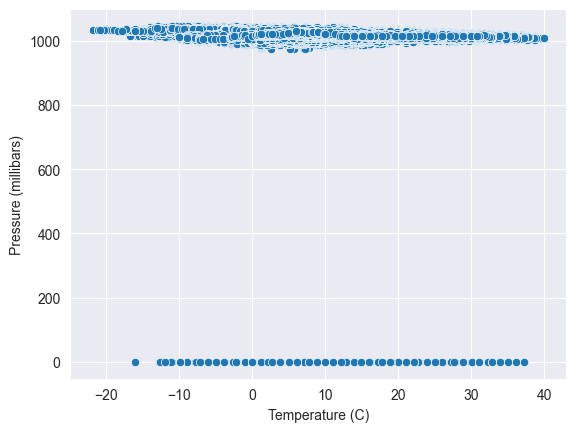

In [59]:
sns.scatterplot(df, x=df['Temperature (C)'], y=df['Pressure (millibars)'])

In [63]:
df['Pressure (millibars)'].describe()

count    96453.000000
mean      1003.235956
std        116.969906
min          0.000000
25%       1011.900000
50%       1016.450000
75%       1021.090000
max       1046.380000
Name: Pressure (millibars), dtype: float64

In [64]:
df['Temperature (C)'].describe()

count    96453.000000
mean        11.932678
std          9.551546
min        -21.822222
25%          4.688889
50%         12.000000
75%         18.838889
max         39.905556
Name: Temperature (C), dtype: float64

In [65]:
print((df['Pressure (millibars)'] == 0).sum())

1288


In [67]:
df_copy = df[df['Pressure (millibars)'] != 0]

In [68]:
df_copy.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date,Month
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00,3
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00,3
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00,4
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00,4
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00,4


In [69]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95165 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            95165 non-null  object             
 1   Summary                   95165 non-null  object             
 2   Precip Type               94648 non-null  object             
 3   Temperature (C)           95165 non-null  float64            
 4   Apparent Temperature (C)  95165 non-null  float64            
 5   Humidity                  95165 non-null  float64            
 6   Wind Speed (km/h)         95165 non-null  float64            
 7   Wind Bearing (degrees)    95165 non-null  float64            
 8   Visibility (km)           95165 non-null  float64            
 9   Loud Cover                95165 non-null  float64            
 10  Pressure (millibars)      95165 non-null  float64            
 11  Daily Summary       

<Axes: xlabel='Temperature (C)', ylabel='Pressure (millibars)'>

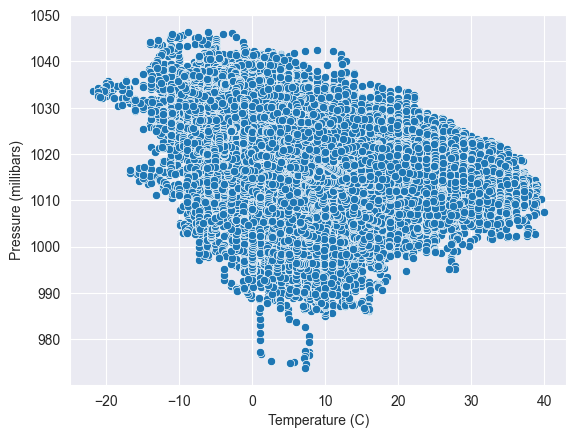

In [70]:
sns.scatterplot(df_copy, x=df_copy['Temperature (C)'], y=df_copy['Pressure (millibars)'])

In [77]:
# del df_copy['Formatted Date']
del df_copy['Summary']
del df_copy['Precip Type']
del df_copy['Daily Summary']

KeyError: 'Summary'

In [78]:
df_copy.corr(method='pearson')

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Date,Month
Temperature (C),1.000000,0.992651,-0.632776,0.010187,0.030783,0.392415,NaN,-0.310455,0.035819,0.151402
Apparent Temperature (C),0.992651,1.000000,-0.603435,-0.055181,0.030026,0.380975,NaN,-0.288400,0.036838,0.160995
Humidity,-0.632776,-0.603435,1.000000,-0.224282,0.001598,-0.370721,NaN,0.039257,0.043677,0.056224
Wind Speed (km/h),0.010187,-0.055181,-0.224282,1.000000,0.101633,0.102955,NaN,-0.253700,-0.014070,-0.099829
Wind Bearing (degrees),0.030783,0.030026,0.001598,0.101633,1.000000,0.047536,NaN,-0.078687,-0.027736,-0.018276
Visibility (km),0.392415,0.380975,-0.370721,0.102955,0.047536,1.000000,NaN,-0.166326,0.106203,-0.067474
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.310455,-0.288400,0.039257,-0.253700,-0.078687,-0.166326,NaN,1.000000,-0.014804,0.114760
Date,0.035819,0.036838,0.043677,-0.014070,-0.027736,0.106203,NaN,-0.014804,1.000000,0.090603
Month,0.151402,0.160995,0.056224,-0.099829,-0.018276,-0.067474,NaN,0.114760,0.090603,1.000000


In [80]:
# X = df_copy[['Temperature (C)'], ['Humidity']]
# y = df_copy['Pressure (millibars)']
# model = LinearRegression()
# model.fit(X, y)
df_copy.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Date,Month
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006-03-31 22:00:00+00:00,3
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006-03-31 23:00:00+00:00,3
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006-04-01 00:00:00+00:00,4
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006-04-01 01:00:00+00:00,4
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006-04-01 02:00:00+00:00,4


In [83]:
df_copy = df_copy.rename(columns={'Temperature (C)': 'Temp'})

In [86]:
X = df_copy[['Temp', 'Humidity']]
y = df_copy['Pressure (millibars)']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [87]:
model.intercept_

1029.1146968046617

In [88]:
model.coef_

array([ -0.38812949, -10.42592797])